Семестровая по машинному обучению на тему «предсказание возраста морского ушка»

Источник данных:
https://archive.ics.uci.edu/ml/datasets/Abalone

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Читаем данные. Названия заголовков даны в файле abalone.names, они были вписаны здесь вручную для удобства.
TODO: умножить на 200

In [107]:
filename = "abalone.data"
columns = ["Sex", "Length", "Diameter",
           "Height", "Whole", "Shucked",
           "Viscera", "Shell", "Rings"]

df = pd.read_csv(filename, names = columns)
df.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Посмотрим распределение данных.

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


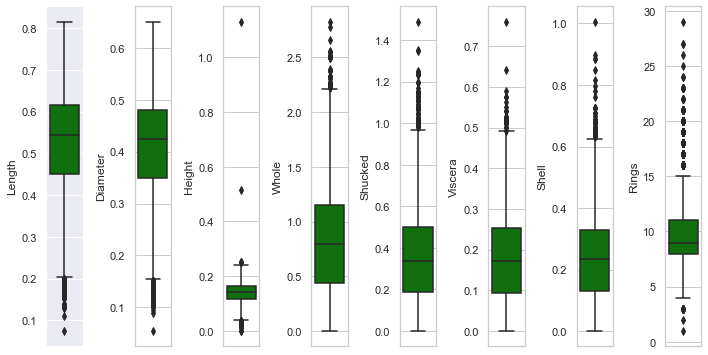

In [108]:
l = df.loc[:, 'Length':].columns.values
number_of_columns = len(l)
number_of_rows = 1
plt.figure(figsize=(10,10))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df[l[i]],color='green',orient='v')
    plt.tight_layout()
    
df.describe()

Заметны следующие выбросы:
 * Высота больше 0,4
 * Вес мяса больше 0,6
 * Вес ракушки больше 0,8
 * Высота может равняться нулю
 
 Убираем, строим график снова.

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.000000,4163.00000
mean,0.523553,0.407495,0.139060,0.825103,0.357788,0.179893,0.237531,9.92025
std,0.119779,0.098944,0.038199,0.484685,0.219240,0.108533,0.136697,3.20580
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.00000
25%,0.450000,0.350000,0.115000,0.441250,0.186000,0.093000,0.130000,8.00000
50%,0.545000,0.425000,0.140000,0.798000,0.335500,0.170000,0.232500,9.00000
75%,0.615000,0.480000,0.165000,1.150000,0.500500,0.252000,0.325750,11.00000
max,0.815000,0.650000,0.250000,2.555000,1.253000,0.590000,0.797500,29.00000


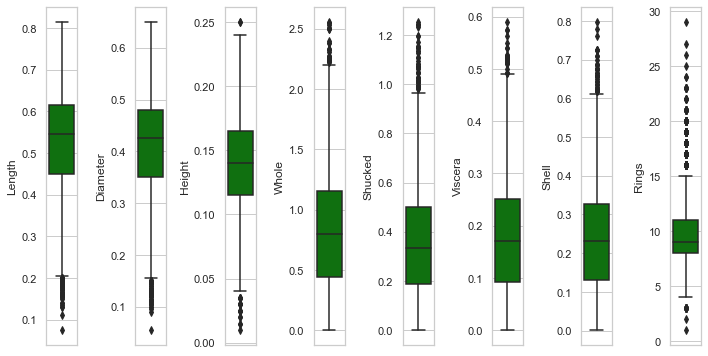

In [109]:
df.drop(df[df["Height"] > 0.4].index, axis=0, inplace=True)
df.drop(df[df["Shucked"] > 1.3].index, axis=0, inplace=True)
df.drop(df[df["Viscera"] > 0.6].index, axis=0, inplace=True)
df.drop(df[df["Shell"] > 0.8].index, axis=0, inplace=True)

df.drop(df[df["Height"] == 0].index, axis=0, inplace=True)

l = df.loc[:, 'Length':].columns.values
number_of_columns = len(l)
number_of_rows = 1
plt.figure(figsize=(10,10))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df[l[i]],color='green',orient='v')
    plt.tight_layout()
    
df.describe()

Посмотрим распределение для каждого пола отдельно

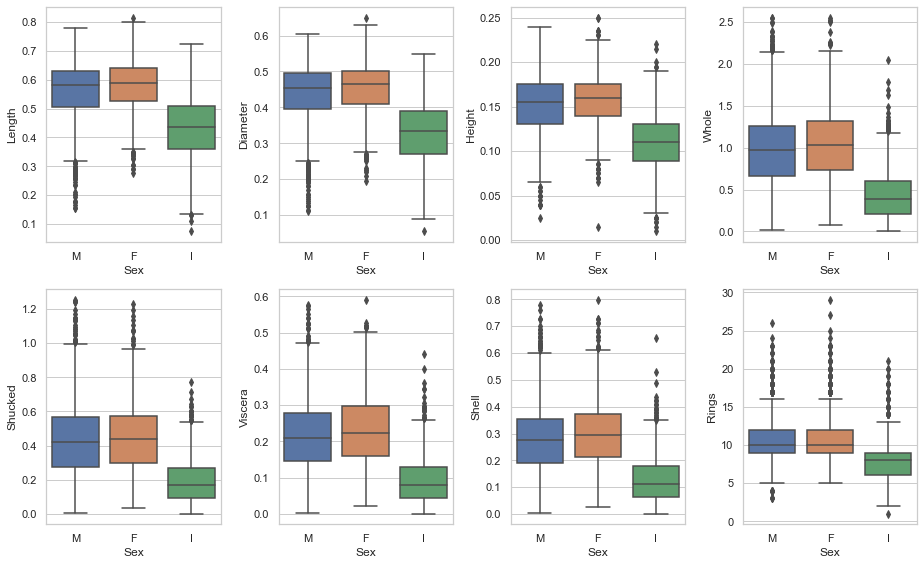

In [110]:
l = df.loc[:, 'Length':].columns
number_of_rows=len(l)
plt.figure(figsize=(13,35))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,4,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x="Sex", y=l[i], data=df, orient='v')
    plt.tight_layout()

Видно, что женские особи слегка больше мужских, но в целом кардинальных отличий нет; дети, естественно, младше и меньше.

Посмотрим зависимости между признаками.

<AxesSubplot:>

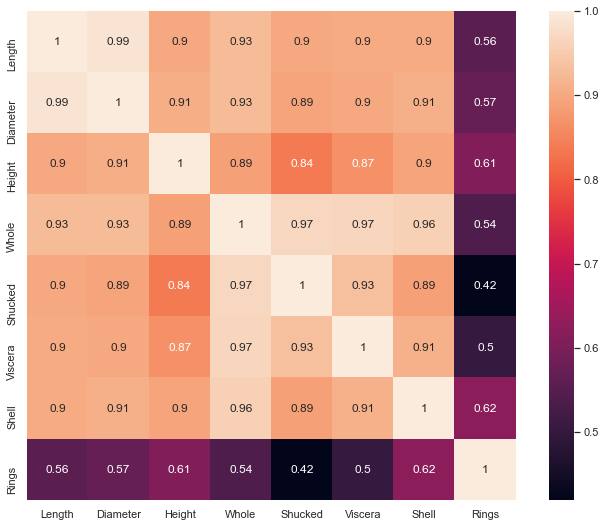

In [111]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

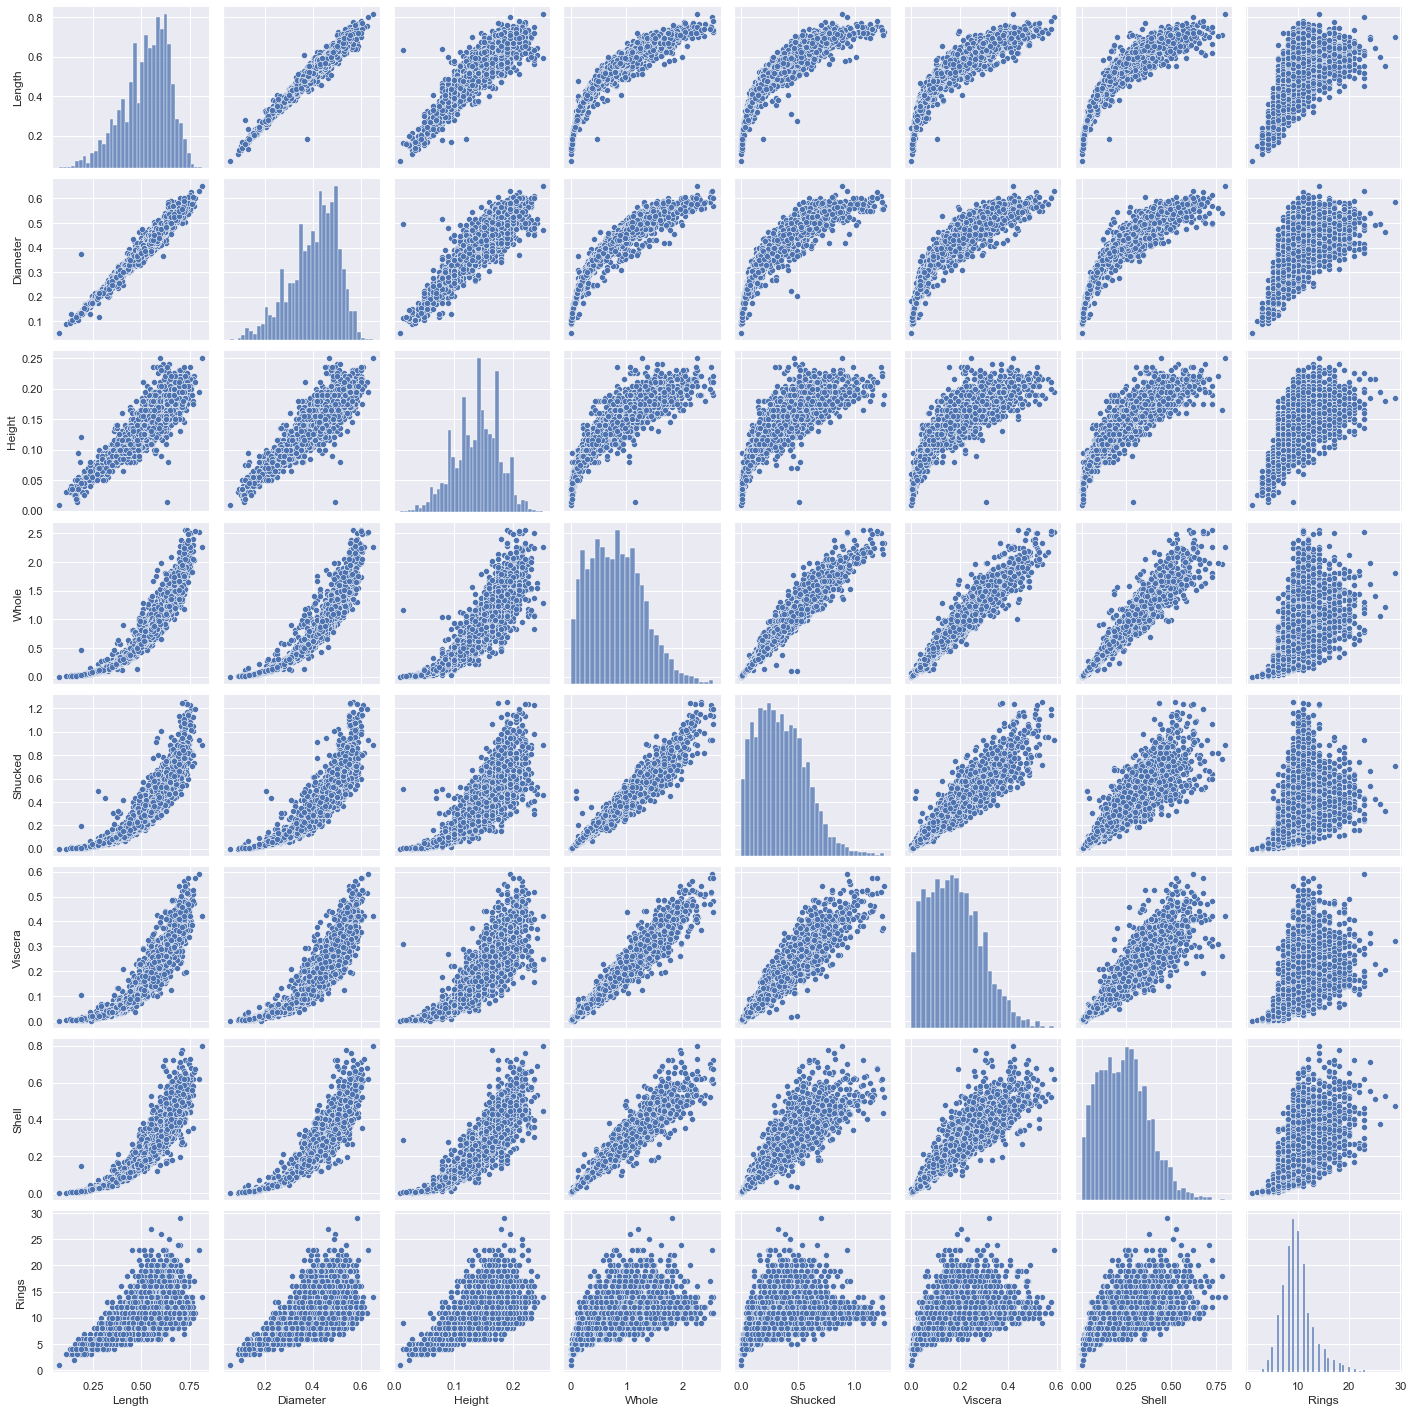

In [112]:
sns.set()
sns.pairplot(df)
plt.show();

Видны следующие закономерности:
 * Длина, диаметр и высота примерно линейно зависят друг от друга
 * Общий вес и вес частей примерно линейно зависят друг от друга
 * Вес зависит от размера нелинейно. Предположение — кубическая зависимость (т.е. плотность разных ушек примерно одинаковая). Проверим это утверждение чуть позже.

Создадим новые признаки:
 * Пол кодируем через one-hot encoding
 * Создаём признак возраст, т.к. нам надо предсказывать именно его
 * Считаем объём и плотность. Объём, очевидно, считается неверно - мы находим объём параллелепипеда, в который ушко можно вписать, само ушко должно быть меньше. Так как все ушки одинаковой формы, то для нахождения реального объёма достаточно умножить полученный нами объём на коэффициент, показывающий, какую долю параллелепипеда занимает ушко, вписанное в него; но объём нам и не нужен точно; нам лишь нужно проверить, что вес линейно зависит от произведения размеров ушка, так что с этим можно не заморачиваться.

In [113]:
df["IsMale"] = (df["Sex"]=="M").astype(int)
df["IsFemale"] = (df["Sex"]=="F").astype(int)
df["Age"] = df["Rings"] + 1.5
df["Volume"] = df["Length"]*df["Height"]*df["Diameter"]
df["ShellDensity"] = df["Shell"] / df["Volume"]
df["WholeDensity"] = df["Whole"] / df["Volume"]
df["VisceraDensity"] = df["Viscera"] / df["Volume"]
df["ShuckedDensity"] = df["Shucked"] / df["Volume"]

In [114]:
df

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings,IsMale,IsFemale,Age,Volume,ShellDensity,WholeDensity,VisceraDensity,ShuckedDensity
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1,0,16.5,0.015777,9.507436,32.578813,6.401673,14.229462
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1,0,8.5,0.008348,8.385744,27.014076,5.810123,11.919736
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0,1,10.5,0.030051,6.988120,22.528368,4.708662,8.535490
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1,0,11.5,0.020075,7.721046,25.703611,5.678705,10.734745
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,0,8.5,0.006732,8.169935,30.451575,5.867499,13.294712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0,1,12.5,0.041951,5.935461,21.143589,5.697089,8.819761
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1,0,11.5,0.035046,7.433088,27.563773,6.120527,12.526394
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1,0,10.5,0.058425,5.271716,20.128370,4.920839,8.994437
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0,1,11.5,0.045469,6.509966,24.071478,5.740206,11.678351


Посмотрим на зависимости. Уберём из рассмотрения все размеры, кроме длины, все веса, кроме общего (ибо мы и так знаем, как они зависят друг от друга), а также пол (ибо он не нагляден).

      Diameter   Whole   Age    Volume  ShellDensity  WholeDensity  \
0        0.365  0.5140  16.5  0.015777      9.507436     32.578813   
1        0.265  0.2255   8.5  0.008348      8.385744     27.014076   
2        0.420  0.6770  10.5  0.030051      6.988120     22.528368   
3        0.365  0.5160  11.5  0.020075      7.721046     25.703611   
4        0.255  0.2050   8.5  0.006732      8.169935     30.451575   
...        ...     ...   ...       ...           ...           ...   
4172     0.450  0.8870  12.5  0.041951      5.935461     21.143589   
4173     0.440  0.9660  11.5  0.035046      7.433088     27.563773   
4174     0.475  1.1760  10.5  0.058425      5.271716     20.128370   
4175     0.485  1.0945  11.5  0.045469      6.509966     24.071478   
4176     0.555  1.9485  13.5  0.076840      6.441978     25.357969   

      VisceraDensity  ShuckedDensity  
0           6.401673       14.229462  
1           5.810123       11.919736  
2           4.708662        8.535490  
3  

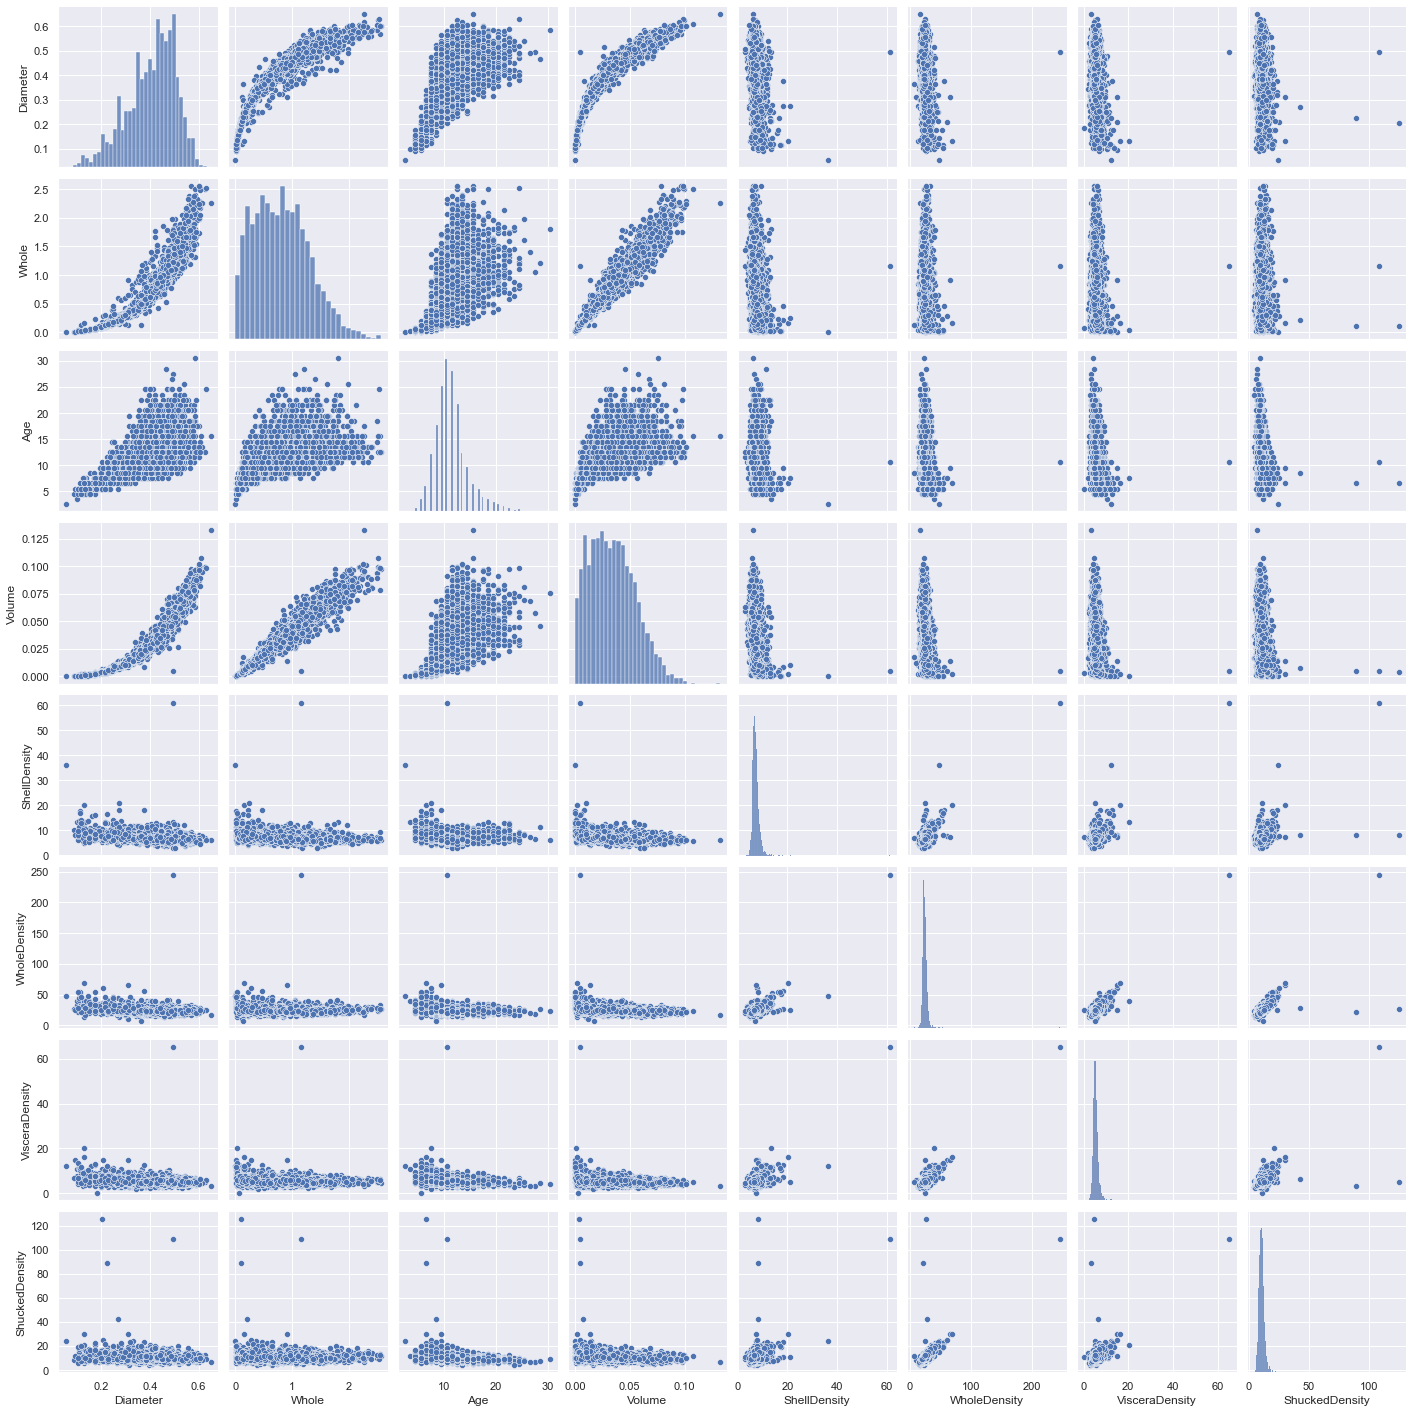

In [115]:
df_look = df.copy()

df_look.drop(["Sex", "IsFemale", "IsMale","Length", "Height", "Shucked", "Viscera", "Shell", "Rings"], axis=1, inplace=True)
print(df_look)
sns.set()
sns.pairplot(df_look)
plt.show();

Видны выбросы плотности. Удаляем, повторяем.

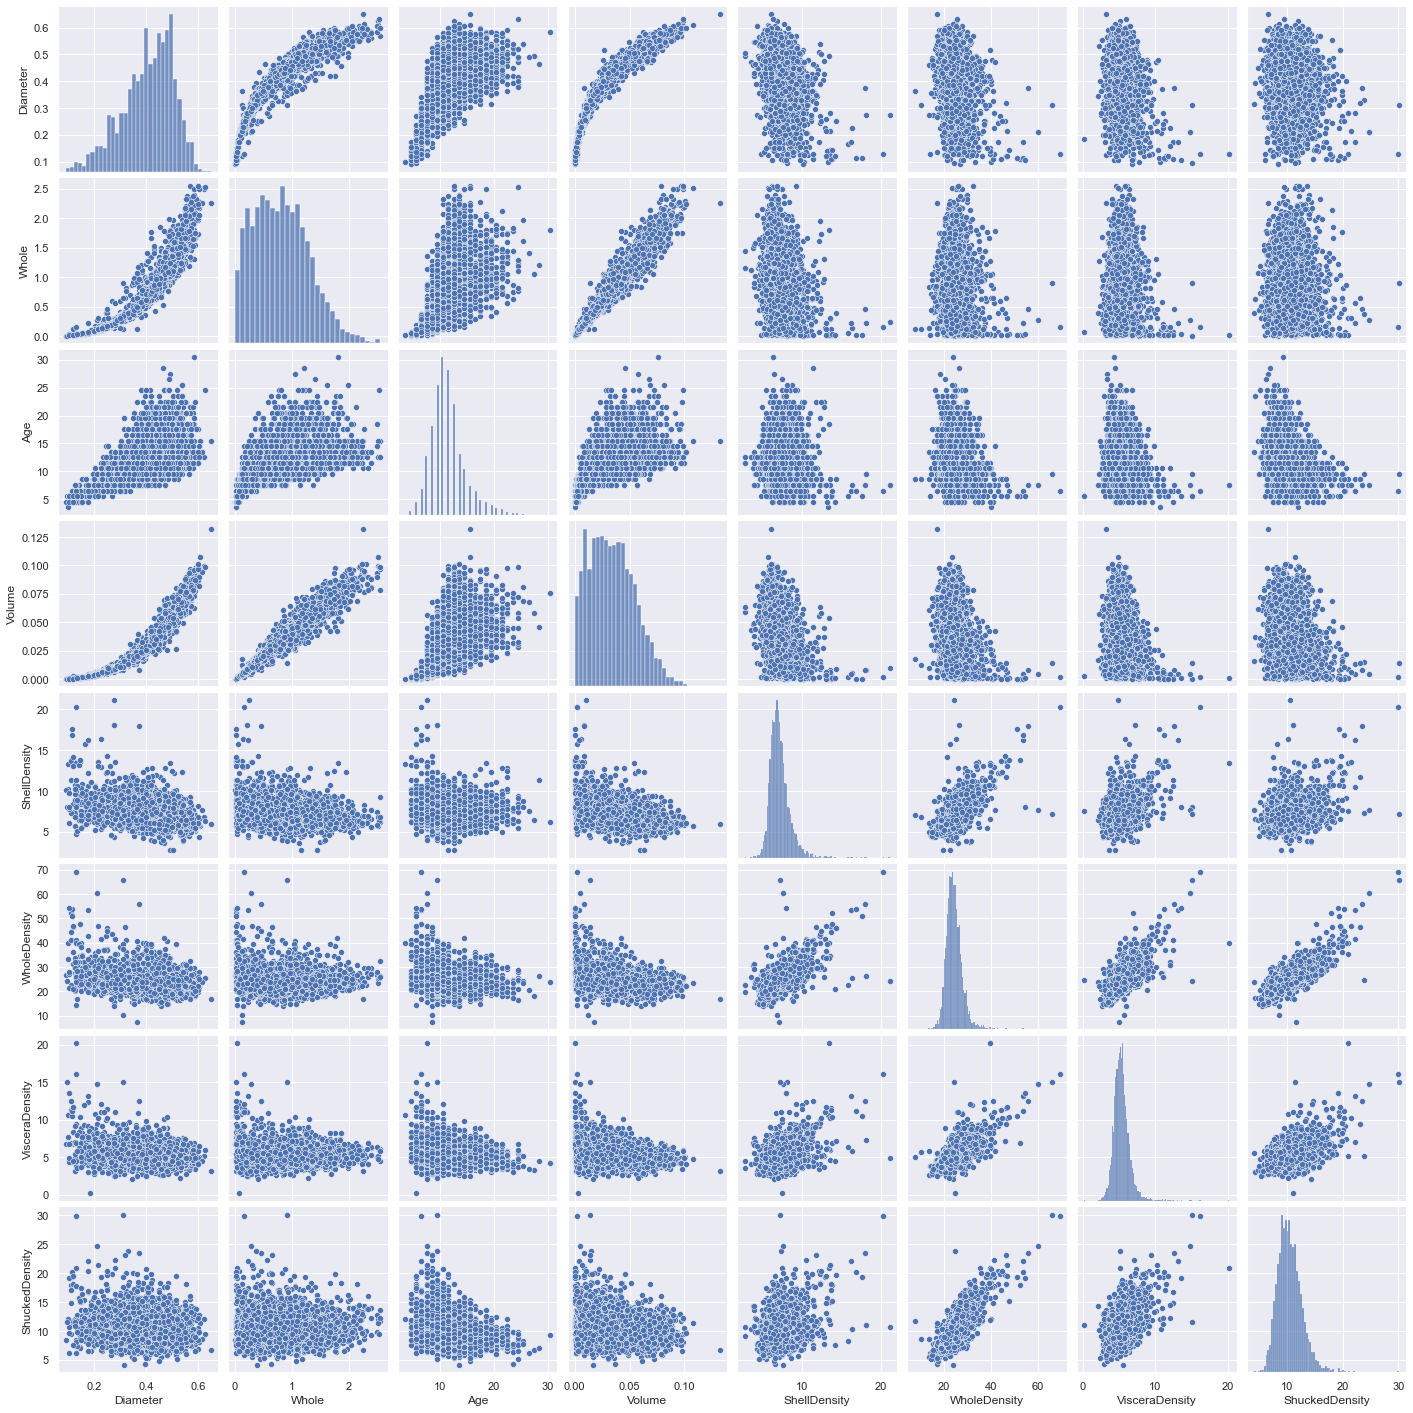

<AxesSubplot:>

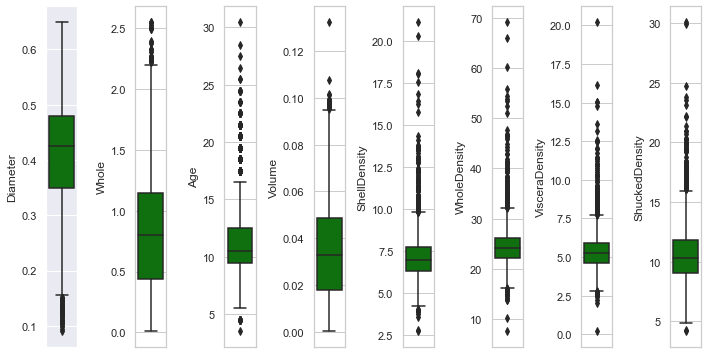

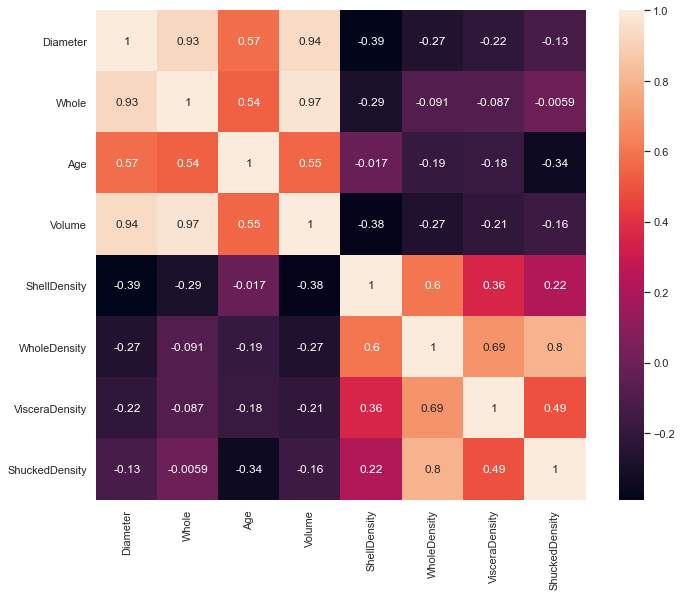

In [117]:
df_look.drop(df_look[df_look["ShellDensity"] > 30].index, axis=0, inplace=True)
df_look.drop(df_look[df_look["WholeDensity"] > 100].index, axis=0, inplace=True)
df_look.drop(df_look[df_look["VisceraDensity"] > 40].index, axis=0, inplace=True)
df_look.drop(df_look[df_look["ShuckedDensity"] > 40].index, axis=0, inplace=True)

sns.set()
sns.pairplot(df_look)
plt.show();

l = df_look.loc[:, 'Diameter':].columns.values
number_of_columns = len(l)
number_of_rows = 1
plt.figure(figsize=(10,10))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=df_look[l[i]],color='green',orient='v')
    plt.tight_layout()
    
corrmat = df_look.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

Выводы, которые можно сделать по этим диаграммам:
 * Вес почти линейно зависит от объёма (логично)
 * Плотность разных ушек в целом очень близка, но не совсем одинаковая; для маленьких ушек разброс плотности больше, чем для больших. Возможно, это связано с большей относительной ошибкой при измерениях при неизменной абсолютной ошибке.
 
 

Исходя из 

In [15]:
clean_df = df.copy()

clean_df.drop(clean_df[clean_df["Height"] > 0.4].index, axis=0, inplace=True)
clean_df.drop(clean_df[clean_df["Shucked"] > 1.3].index, axis=0, inplace=True)
clean_df.drop(clean_df[clean_df["Viscera"] > 0.6].index, axis=0, inplace=True)
clean_df.drop(clean_df[clean_df["Shell"] > 0.8].index, axis=0, inplace=True)
clean_df.drop(clean_df[clean_df["Height"] > 0.4].index, axis=0, inplace=True)

clean_df.drop(["Sex","Length", "Whole", "Rings"], axis=1, inplace=True)


<AxesSubplot:>

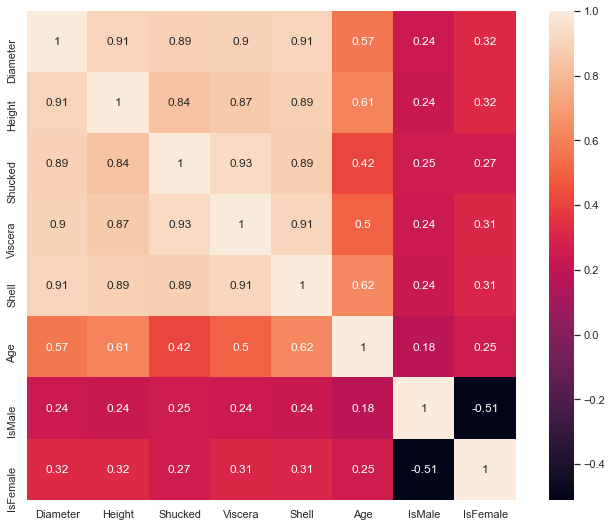

In [16]:
corrmat = clean_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

In [30]:
clean_df_2 = df.copy()

clean_df_2.drop(clean_df_2[clean_df_2["Height"] > 0.4].index, axis=0, inplace=True)
clean_df_2.drop(clean_df_2[clean_df_2["Shucked"] > 1.3].index, axis=0, inplace=True)
clean_df_2.drop(clean_df_2[clean_df_2["Viscera"] > 0.6].index, axis=0, inplace=True)
clean_df_2.drop(clean_df_2[clean_df_2["Shell"] > 0.8].index, axis=0, inplace=True)
clean_df_2.drop(clean_df_2[clean_df_2["Height"] > 0.4].index, axis=0, inplace=True)

clean_df_2.drop(["Sex", "Length", "Height", "Whole", "Viscera", "Shell", "Rings", ], axis=1, inplace=True)


<AxesSubplot:>

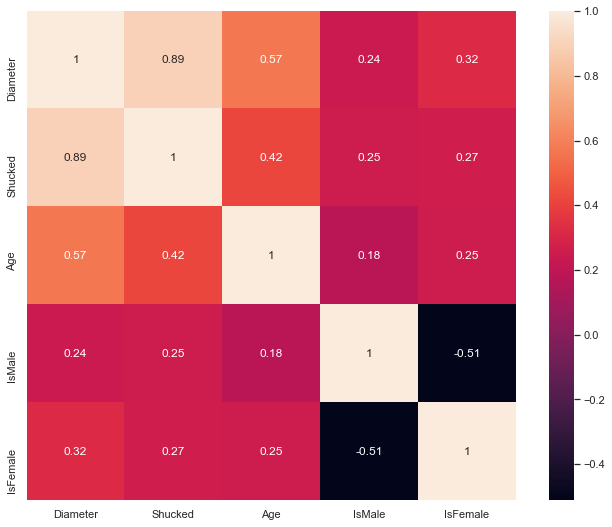

In [31]:
corrmat = clean_df_2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True)

In [32]:
import sklearn

from sklearn.preprocessing import StandardScaler

In [20]:
scaler1 = StandardScaler()
scaler1.fit(clean_df)
ndata_1 = scaler1.transform(clean_df)

In [21]:
scaler2 = StandardScaler()
scaler2.fit(clean_df_2)
ndata_2 = scaler2.transform(clean_df_2)

In [22]:
ndata_1

array([[-0.42885041, -1.14844407, -0.60750826, ...,  1.5852054 ,
         1.31777497, -0.67398796],
       [-1.4394374 , -1.27897044, -1.17770472, ..., -0.91061485,
         1.31777497, -0.67398796],
       [ 0.12697243, -0.10423307, -0.46153796, ..., -0.28665979,
        -0.7588549 ,  1.48370602],
       ...,
       [ 0.68279527,  1.72313618,  0.76552483, ..., -0.28665979,
         1.31777497, -0.67398796],
       [ 0.78385397,  0.28734606,  0.79061347, ...,  0.02531774,
        -0.7588549 ,  1.48370602],
       [ 1.49126486,  1.46208343,  2.68138495, ...,  0.6492728 ,
         1.31777497, -0.67398796]])

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVR, NuSVR
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import *

  
    

In [24]:
def test_model(train_X, train_y, test_X, test_y, model, params=[{}], sep='',
 show_params=True, return_errors=False, print_errors=True, save_model=True, folder_save_to = './test_models/', preprint_message = '', check_time = False):
    if return_errors:
        res = []
    for param in params:
        test_model = model(**param)
        if check_time:
            time_start = time()
        test_model.fit(train_X, train_y)
        if check_time:
            time_end = time()
        if preprint_message!='':
            print(preprint_message)
        if params != [{}] and show_params:
            print("Параметры:", param)
        if print_errors:
            print("Оценка (MAE):", mean_absolute_error(test_model.predict(test_X).astype(int), test_y))
            print(end=sep)
        if check_time:
            print(f"Время: {time_end-time_start}")
        if return_errors:
            res.append(mean_absolute_error(test_model.predict(test_X).astype(int), test_y))
    if return_errors:
        return res

In [25]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
def split_data(df):
    X_data, Y_data = df.loc[:,:], df["Age"]
    X_data = X_data.drop(['Age'], axis=1, inplace=False)
    X_train,  X_test,  y_train,  y_test =  train_test_split(X_data, Y_data,  test_size= 0.20,  random_state= 42 )
    splitted_data = [X_train, y_train, X_test, y_test]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    norm_X_train = scaler.transform(X_train)
    norm_X_test = scaler.transform(X_test)
    norm_splitted_data = [norm_X_train, y_train, norm_X_test, y_test]

    # данные, дополненные полиномами
    poly = PolynomialFeatures(degree = 2)
    poly_splitted_data = [poly.fit_transform(norm_X_train), y_train, poly.transform(norm_X_test), y_test]
    return norm_splitted_data, poly_splitted_data

In [27]:
clean_df

,Diameter,Height,Shucked,Viscera,Shell,Age,IsMale,IsFemale
0,0.365,0.095,0.2245,0.1010,0.1500,16.5,1,0
1,0.265,0.090,0.0995,0.0485,0.0700,8.5,1,0
2,0.420,0.135,0.2565,0.1415,0.2100,10.5,0,1
3,0.365,0.125,0.2155,0.1140,0.1550,11.5,1,0
4,0.255,0.080,0.0895,0.0395,0.0550,8.5,0,0
...,...,...,...,...,...,...,...,...
4172,0.450,0.165,0.3700,0.2390,0.2490,12.5,0,1
4173,0.440,0.135,0.4390,0.2145,0.2605,11.5,1,0
4174,0.475,0.205,0.5255,0.2875,0.3080,10.5,1,0
4175,0.485,0.150,0.5310,0.2610,0.2960,11.5,0,1


In [28]:
splitted_data, poly_splitted_data = split_data(clean_df)

In [29]:

test_model(*splitted_data, SVR, params=[
    {'kernel': 'linear', 'gamma':'auto'}, 
    {'kernel': 'poly', 'degree': 2, 'gamma':'auto'}, 
    {'kernel': 'rbf', 'gamma':'auto'}], preprint_message = 'SVR')

params = [
    {'C':1.0, 'max_iter':10000}, 
    {'C':5.0, 'max_iter':100000}, 
    {'C':125.0, 'max_iter':100000},
    {'C':625.0, 'max_iter':100000},
    {'C':2500.0, 'max_iter':100000},
    {'C':12500.0, 'max_iter':100000},
    {'C':62500.0, 'max_iter':100000},]
test_model(*splitted_data, LinearSVR, params=params, preprint_message = 'LinearSVR')

params = [{'nu':x, 'gamma':'auto'} for x in [.01,.1,.2,.3,.4,.5,.6,.8,1.0]]
test_model(*splitted_data, NuSVR, params=params, preprint_message = 'NuSVR')

params = [{"max_depth":x} for x in range(1,10)]
test_model(*splitted_data, DecisionTreeRegressor, params, preprint_message = 'DecisionTreeRegressor')

params = [{'n_neighbors':x} for x in (3,4,5,6,7,8,9,10)]
test_model(*splitted_data, KNeighborsRegressor, params = params, preprint_message = 'KNeighborsRegressor')

params = [{'alpha':x} for x in (0.001, 0.01, 0.1, 1.0, 10.0)]
test_model(*splitted_data, KernelRidge, params = params, preprint_message = 'KernelRidge')

SVR
Параметры: {'kernel': 'linear', 'gamma': 'auto'}
Оценка (MAE): 1.7232893157262905
SVR
Параметры: {'kernel': 'poly', 'degree': 2, 'gamma': 'auto'}
Оценка (MAE): 1.9633853541416566
SVR
Параметры: {'kernel': 'rbf', 'gamma': 'auto'}
Оценка (MAE): 1.6608643457382952
LinearSVR
Параметры: {'C': 1.0, 'max_iter': 10000}
Оценка (MAE): 1.7316926770708283
LinearSVR
Параметры: {'C': 5.0, 'max_iter': 100000}
Оценка (MAE): 1.7292917166866746
LinearSVR
Параметры: {'C': 125.0, 'max_iter': 100000}
Оценка (MAE): 1.726890756302521


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR
Параметры: {'C': 625.0, 'max_iter': 100000}
Оценка (MAE): 1.728091236494598


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR
Параметры: {'C': 2500.0, 'max_iter': 100000}
Оценка (MAE): 1.7388955582232892


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR
Параметры: {'C': 12500.0, 'max_iter': 100000}
Оценка (MAE): 1.8025210084033614


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR
Параметры: {'C': 62500.0, 'max_iter': 100000}
Оценка (MAE): 2.5720288115246097
NuSVR
Параметры: {'nu': 0.01, 'gamma': 'auto'}
Оценка (MAE): 3.3547418967587035
NuSVR
Параметры: {'nu': 0.1, 'gamma': 'auto'}
Оценка (MAE): 1.7641056422569028
NuSVR
Параметры: {'nu': 0.2, 'gamma': 'auto'}
Оценка (MAE): 1.563625450180072
NuSVR
Параметры: {'nu': 0.3, 'gamma': 'auto'}
Оценка (MAE): 1.5924369747899159
NuSVR
Параметры: {'nu': 0.4, 'gamma': 'auto'}
Оценка (MAE): 1.6152460984393757
NuSVR
Параметры: {'nu': 0.5, 'gamma': 'auto'}
Оценка (MAE): 1.628451380552221
NuSVR
Параметры: {'nu': 0.6, 'gamma': 'auto'}
Оценка (MAE): 1.634453781512605
NuSVR
Параметры: {'nu': 0.8, 'gamma': 'auto'}
Оценка (MAE): 1.6536614645858343
NuSVR
Параметры: {'nu': 1.0, 'gamma': 'auto'}
Оценка (MAE): 1.662064825930372
DecisionTreeRegressor
Параметры: {'max_depth': 1}
Оценка (MAE): 1.9945978391356542
DecisionTreeRegressor
Параметры: {'max_depth': 2}
Оценка (MAE): 1.8841536614645857
DecisionTreeRegressor
Параметры: {'ma